# Imports

In [125]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [126]:
n = 6
label_name = "stat2"
epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [128]:

layers = [2]
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [129]:
import os

directory = "models"
if not os.path.exists(directory):
    os.makedirs(directory)


for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")


Epoch 0, Loss 6.665090501308441
Epoch 1, Loss 6.616724669933319
Epoch 2, Loss 6.552071630954742
Epoch 3, Loss 6.478443145751953
Epoch 4, Loss 6.4061877727508545
Epoch 5, Loss 6.3330910205841064
Epoch 6, Loss 6.264178693294525
Epoch 7, Loss 6.196658790111542
Epoch 8, Loss 6.130626142024994
Epoch 9, Loss 6.066370487213135
Epoch 10, Loss 6.0032965540885925
Epoch 11, Loss 5.9425036907196045
Epoch 12, Loss 5.883610308170319
Epoch 13, Loss 5.824355781078339
Epoch 14, Loss 5.768004834651947
Epoch 15, Loss 5.713178396224976
Epoch 16, Loss 5.657243967056274
Epoch 17, Loss 5.60387510061264
Epoch 18, Loss 5.551573097705841
Epoch 19, Loss 5.499768257141113
Epoch 20, Loss 5.449340224266052
Epoch 21, Loss 5.399482190608978
Epoch 22, Loss 5.351044058799744
Epoch 23, Loss 5.303057909011841
Epoch 24, Loss 5.256799757480621
Epoch 25, Loss 5.210456550121307
Epoch 26, Loss 5.164670526981354
Epoch 27, Loss 5.120643496513367
Epoch 28, Loss 5.076533257961273
Epoch 29, Loss 5.033844828605652
Epoch 30, Loss 4.

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

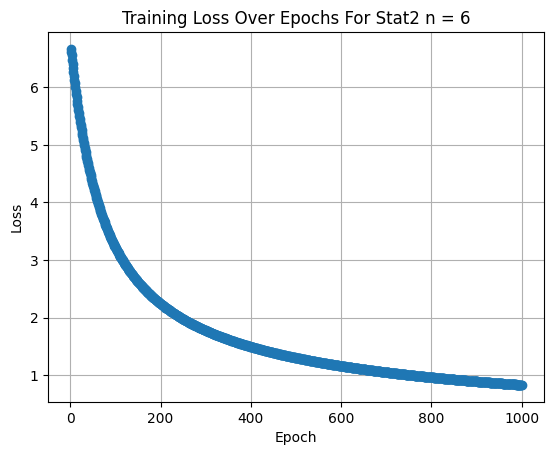

In [131]:
# Plot the training losses
plt.figure()
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title('Training Loss Over Epochs For Stat2 n = 6')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Ensure the "figures" directory exists
figures_directory = "figures"
if not os.path.exists(figures_directory):
    os.makedirs(figures_directory)

# Save the plot
plt.savefig(os.path.join(figures_directory, 'training_loss_curve_stat2_n = 6.png'))
plt.show()
plt.close()  # Explicitly close the plot to ensure it is written to the file





# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

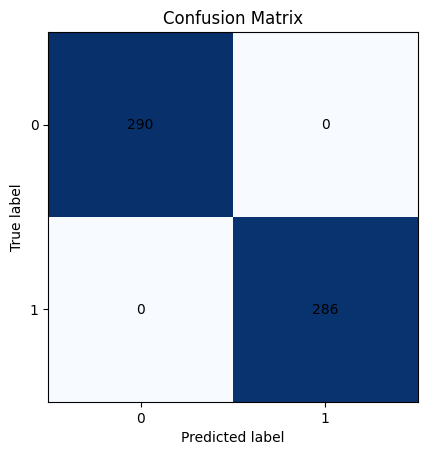

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


In [132]:
# TOD0
confusion_matrix = evaluate_model(model, training_dataset)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

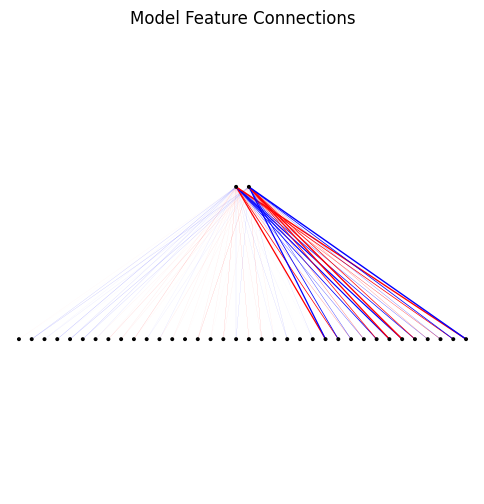

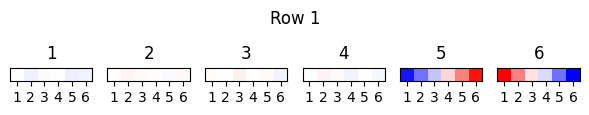

In [134]:



model.plot_connections()

#model.plot_heatmap_feature(0, 0)
model.plot_heatmap_feature(0, 1)



